### Dataset ficticio VIVIENDAS (Adecuado)

- 🔍 Objetivo: Predecir el peso de las viviendas en función de su superficie
- 🧠 Ejemplo de regresión simple: A mayor superficie, mayor precio de la vivienda.

Error MAE: 7387.15 (puntos de progresión)
R²: 0.85
RMSE: 9342.64
MAPE: 5.24%
                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     621.8
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           6.58e-39
Time:                        13:29:25   Log-Likelihood:                -845.52
No. Observations:                  80   AIC:                             1695.
Df Residuals:                      78   BIC:                             1700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

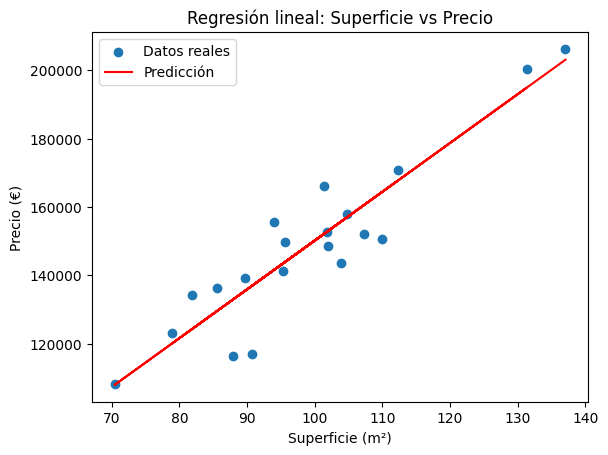

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import statsmodels.api as sm

# Generar datos sintéticos
np.random.seed(42)
superficie = np.random.normal(100, 20, 100)  # Metros cuadrados
precio = superficie * 1500 + np.random.normal(0, 10000, 100)  # Relación con ruido

df = pd.DataFrame({'superficie': superficie, 'precio': precio})

X = df[['superficie']]
y = df['precio']

# Dividir y entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Evaluar el modelo
# Calculamos el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresión)")
# Calculamos el Coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")
# Calculamos el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
# Calculamos el Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
# Calculo de la prueba F y P-valor
X_train_const = sm.add_constant(X_train)  # Agregar término de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()
print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

print(f"MAE: {mae:.2f} €")
print(f"R²: {r2:.2f}")

# Graficar
plt.scatter(X_test, y_test, label="Datos reales")
plt.plot(X_test, y_pred, color="red", label="Predicción")
plt.xlabel("Superficie (m²)")
plt.ylabel("Precio (€)")
plt.title("Regresión lineal: Superficie vs Precio")
plt.legend()
plt.show()

#### Evaluación del Modelo
- MAE = 7387.15  → En promedio, el modelo se equivoca en 7387.15$ del precio de la vivienda.
- RMSE = 9342.64 → Penaliza más los errores grandes
- R² = 0.85 → El modelo solo explica el 85% de la variabilidad en los precios de la vivienda.

Probamos nuestro modelo introduciendo nuevos datos:

In [ ]:
# Función para predecir precio según la superficie
def predecir_precio(superficie):
    superficie = np.array(superficie).reshape(-1, 1)  # Convertir a array 2D
    precio_predicho = modelo.predict(superficie)
    return precio_predicho[0]

# Ejemplo de uso
nueva_superficie = float(50)
precio_estimado = predecir_precio([[nueva_superficie]])
print(f"Precio estimado para {nueva_superficie} m²: {precio_estimado:.2f} €")

Precio estimado para 50.0 m²: 78683.14 €


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Modelos Machine Learning\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
